### Construcción del Lugar Geométrico de las Raíces (LGR).

**Objetivo:**
Visualizar el efecto del controlador PD diseñado sobre la estabilidad y la dinámica del sistema de posicionamiento robótico. Utilizaremos el LGR para verificar la ubicación de los polos en lazo cerrado y confirmar geométricamente el factor de amortiguamiento $\zeta$.

**Sistema:**
* Planta: 
$$G_p(s) = \frac{10}{s(s+2)}$$
* Controlador PD diseñado:
$$G_c(s) = 0.6s + 3.2$$

Analizaremos la función de lazo abierto: 
$$G_{LA}(s) = G_c(s)G_p(s)$$
El LGR nos mostrará cómo se mueven los polos a medida que variamos la ganancia total del sistema. Nuestro diseño específico corresponde al punto donde la ganancia $K=1$.

In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición de la Planta y el Controlador. ---
# Planta: Gp(s) = 10 / (s^2 + 2s).
Gp = ct.tf([10], [1, 2, 0])

# Controlador: Gc(s) = 0.6s + 3.2.
# Nota: Esto introduce un CERO en s = -Kp/Kd = -3.2/0.6 = -5.33.
Kp = 3.2
Kd = 0.6
Gc = ct.tf([Kd, Kp], [1])


# --- 2. Función de Transferencia de Lazo Abierto (G_LA). ---
# El LGR se dibuja a partir de la función de lazo abierto.
G_LA = Gc * Gp

print("Función de Lazo Abierto G_LA(s):")
print(G_LA)

# Calculamos el cero y los polos de lazo abierto para referencia.
ceros_la = ct.zeros(G_LA)
polos_la = ct.poles(G_LA)
print(f"\nCeros de Lazo Abierto (Círculos 'o'): {ceros_la}")
print(f"Polos de Lazo Abierto (Cruces 'x'): {polos_la}")

Función de Lazo Abierto G_LA(s):
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  6 s + 32
  ---------
  s^2 + 2 s

Ceros de Lazo Abierto (Círculos 'o'): [-5.33333333+0.j]
Polos de Lazo Abierto (Cruces 'x'): [-2.+0.j  0.+0.j]


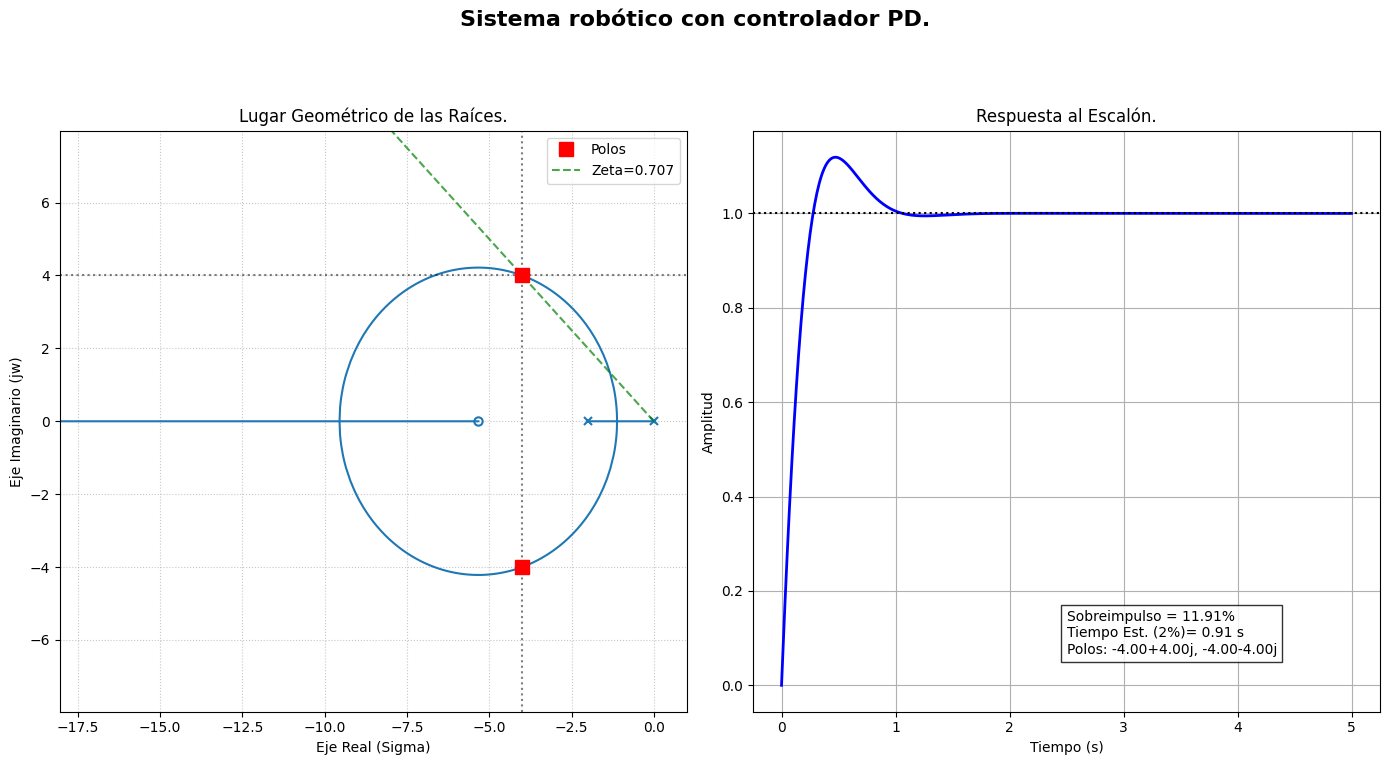

In [2]:
# --- 3. Gráfica del Lugar Geométrico de las Raíces y de la Respuesta en el tiempo. ---
# Tamaño de la figura (de lado izquiero el LGR y del lado derecho la respuesta del tiempo).
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))


# --- GRÁFICA 1: LUGAR GEOMÉTRICO (Izquierda) ---
# a. Se obtiene el mapa del lugar de las raíces.
rl_data = ct.root_locus_map(G_LA)
rl_data.plot(ax=ax1)
ax1.legend(loc='upper right')
ax1.grid(True, linestyle=':', alpha=0.7)

# b. Se calcula el sistema en lazo cerrado y se determinan los polos.
G_LC = ct.feedback(G_LA, 1)
polos = ct.poles(G_LC)
    
# c. Se dibujan los polos (cuadros rojos).
h_polos, = ax1.plot(np.real(polos), np.imag(polos), 'rs', markersize=10, label=f'Polos', zorder=10)
    
# d. Se incluye una referencia de diseño (Zeta=0.707).
h_zeta, = ax1.plot([0, -10], [0, 10], 'g--', alpha=0.7, label='Zeta=0.707')

# e. Se muestran líneas punteadas para marcar la ubicación -4 + j4.
ax1.axvline(x=-4, color='k', linestyle=':', alpha=0.5)
ax1.axhline(y=4, color='k', linestyle=':', alpha=0.5)

# f. Se muestran los títulos y las líneas de referencia de los ejes.
ax1.set_title('Lugar Geométrico de las Raíces.')
ax1.set_xlabel('Eje Real (Sigma)')
ax1.set_ylabel('Eje Imaginario (jw)')
ax1.legend(handles=[h_polos, h_zeta], loc='upper right')


# --- GRÁFICA 2: RESPUESTA AL ESCALÓN (Derecha). ---
# a. Se crea el vector de tiempo y se obtiene la respuesta en el dominio del tiempo.
t = np.linspace(0, 5, 500)
t, y = ct.step_response(G_LC, T=t)

# b. Se grafica la respuesta y se incluye el valor de referencia.    
ax2.plot(t, y, 'b-', linewidth=2)
ax2.axhline(1, color='k', linestyle=':')
ax2.set_title(f'Respuesta al Escalón.')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud')
ax2.grid(True)
    
# c. Se obtienen los datos de la respuesta.
info = ct.step_info(G_LC)
texto_info = (f"Sobreimpulso = {info['Overshoot']:.2f}%\n"
                  f"Tiempo Est. (2%)= {info['SettlingTime']:.2f} s\n"
                  f"Polos: {polos[0]:.2f}, {polos[1]:.2f}")
    
# d. Se coloca la información dentro de la gráfica.
ax2.text(0.5, 0.1, texto_info, transform=ax2.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))


# --- Se muetran ambas gráficas. ---
fig.suptitle('Sistema robótico con controlador PD.', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


#### Interpretación de los resultados.

A continuación, analizamos la relación entre el lugar geométrico (izquierda) y la respuesta temporal (derecha):

1.  **Trayectoria de las ramas (gráfica izquierda):**
    Observe en el LGR cómo las ramas (líneas azules) nacen en los polos de lazo abierto ($s=0$ y $s=-2$) y viajan sobre el eje real. Eventualmente, colisionan y se separan (punto de ruptura), viajando hacia el plano complejo.
    * Una rama termina en el **cero** que introdujimos con el controlador PD ($s \approx -5.33$).
    * La otra rama tiende hacia el infinito asintóticamente.

2.  **Verificación del diseño (gráfica izquierda):**
    Los **cuadros rojos** indican los polos de lazo cerrado con la ganancia actual ($K=1$).
    * Note que caen **exactamente** sobre la intersección de las ramas azules y la línea verde discontinua.
    * La línea verde representa el lugar geométrico de amortiguamiento constante $\zeta = 0.707$ (un ángulo de $45^\circ$).
    * Esto confirma visualmente que el cálculo analítico fue correcto: los polos están ubicados en $s = -4 \pm 4j$.

3.  **La causa del sobreimpulso (conexión entre gráficas):**
    Al mirar la **gráfica de la derecha (tiempo)**, vemos un sobreimpulso del **11.9%**, a pesar de que diseñamos teóricamente para un 5%.
    * **¿Por qué?** Si observa de nuevo el LGR, verá el **cero** del controlador en $-5.33$ (círculo 'o').
    * Aunque los polos (cuadros rojos) están en la posición correcta para $\zeta=0.707$, la cercanía de este cero a los polos dominantes añade un efecto de "anticipación" o derivada pura.
    * Esto inyecta energía extra al inicio de la respuesta, causando que el sistema "salte" más alto de lo que predecía la teoría de segundo orden puro.

Como resultado, el LGR nos permite ver claramente qué tan cerca está ese cero de nuestros polos dominantes.

---

#### Análisis interactivo: visualización dinámica del LGR.

Hasta este punto, hemos analizado el sistema con un diseño fijo. Sin embargo, el verdadero poder del Lugar Geométrico de las Raíces radica en entender cómo evoluciona el sistema al variar sus parámetros.

A continuación, se presenta una herramienta interactiva que conecta el LGR y la respuesta en el tiempo.

Al mover el deslizador de la **Ganancia $K$**, podrá observar en tiempo real:
1.  **Trayectoria de los Polos (Izquierda):** Cómo los polos de lazo cerrado (cuadros rojos) viajan a lo largo de las ramas azules del LGR.
2.  **Impacto en la respuesta (Derecha):** Cómo ese movimiento en el plano complejo se traduce instantáneamente en cambios en el sobreimpulso, la velocidad y la estabilidad del sistema.

**Instrucción:** Ejecute la siguiente celda y mueva el deslizador `Ganancia K` para explorar las distintas respuestas posibles del sistema robótico.

In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# --- 1. Definición de la Planta y el Controlador. ---
# Planta: Gp(s) = 10 / (s^2 + 2s).
Gp = ct.tf([10], [1, 2, 0])

# Controlador: Gc(s) = 0.6s + 3.2.
# Nota: Esto introduce un CERO en s = -Kp/Kd = -3.2/0.6 = -5.33.
Kp = 3.2
Kd = 0.6
Gc = ct.tf([Kd, Kp], [1])


# --- 2. Función de Transferencia de Lazo Abierto (G_LA). ---
# El LGR se dibuja a partir de la función de lazo abierto.
G_LA = Gc * Gp


# --- 3. Función de actualización interactiva. ---
def plot_interactivo(K=1.0):
    """
    Esta función se ejecuta cada vez que mueves el slider.
    :param K: Ganancia adicional del sistema.
    """
    
    # a. Se calcula el sistema en lazo cerrado dinámico (depende de K).
    # G_LC = (K * G_LA) / (1 + K * G_LA)
    G_LC = ct.feedback(K * G_LA, 1)
    
    # b. Se determinan los polos actuales.
    polos = ct.poles(G_LC)

    # --- Configuración de la figura ---
    # Tamaño de la figura (de lado izquierdo el LGR y del lado derecho la respuesta del tiempo).
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))


    # --- GRÁFICA 1: LUGAR GEOMÉTRICO (Izquierda) ---
    # a. Se obtiene el mapa del lugar de las raíces (basado en G_LA fijo).
    rl_data = ct.root_locus_map(G_LA)
    rl_data.plot(ax=ax1)
    ax1.grid(True, linestyle=':', alpha=0.7)
    
    # b. Se dibujan los polos actuales (cuadros rojos dinámicos).
    h_polos, = ax1.plot(np.real(polos), np.imag(polos), 'rs', markersize=10, label=f'Polos (K={K:.2f})', zorder=10)
        
    # c. Se incluye una referencia de diseño (Zeta=0.707).
    h_zeta, = ax1.plot([0, -10], [0, 10], 'g--', alpha=0.7, label='Zeta=0.707')

    # d. Se muestran los títulos y las líneas de referencia de los ejes.
    ax1.set_title('Lugar Geométrico de las Raíces.')
    ax1.set_xlabel('Eje Real (Sigma)')
    ax1.set_ylabel('Eje Imaginario (jw)')
    ax1.legend(handles=[h_polos, h_zeta], loc='upper right')


    # --- GRÁFICA 2: RESPUESTA AL ESCALÓN (Derecha). ---
    # a. Se crea el vector de tiempo y se obtiene la respuesta en el dominio del tiempo.
    t = np.linspace(0, 5, 500)
    t, y = ct.step_response(G_LC, T=t)

    # b. Se grafica la respuesta y se incluye el valor de referencia.    
    ax2.plot(t, y, 'b-', linewidth=2)
    ax2.axhline(1, color='k', linestyle=':')
    ax2.set_title(f'Respuesta al Escalón.')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Amplitud')
    ax2.grid(True)
        
    # c. Se obtienen los datos de la respuesta.
    info = ct.step_info(G_LC)
    texto_info = (f"Sobreimpulso = {info['Overshoot']:.2f}%\n"
                  f"Tiempo Est. (2%)= {info['SettlingTime']:.2f} s\n"
                  f"Polos: {polos[0]:.2f}, {polos[1]:.2f}")
        
    # d. Se coloca la información dentro de la gráfica.
    ax2.text(0.5, 0.1, texto_info, transform=ax2.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))


    # --- Se muestran ambas gráficas. ---
    fig.suptitle(f'Sistema robótico con controlador PD (Ganancia K={K:.1f})', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()
    plt.close(fig)

# --- 4. Crear el slider. ---
print("==================================================================================")
print("Mueva el deslizador para cambiar la Ganancia K y ver el efecto en tiempo real:")
print("==================================================================================")

interact(plot_interactivo, 
         K=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.05, 
                       description='Ganancia K:', continuous_update=False));

Mueva el deslizador para cambiar la Ganancia K y ver el efecto en tiempo real:


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Ganancia K:', max=10.0, min…